In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

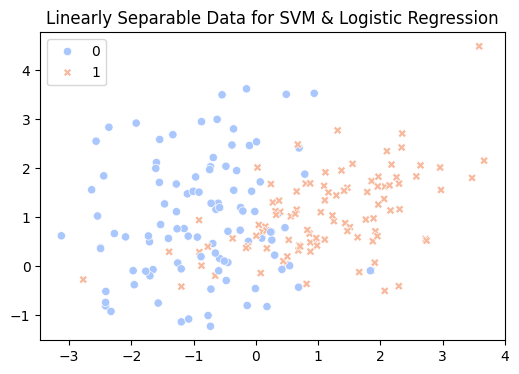

In [8]:
# Generate dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.figure(figsize=(6,4))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, palette='coolwarm')
plt.title("Linearly Separable Data for SVM & Logistic Regression")
plt.show()

In [9]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model and print classification metrics"""
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n=== {model_name} Metrics ===")
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    
    return y_pred

In [12]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_log_reg = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")


=== Logistic Regression Metrics ===
Accuracy: 0.88
Confusion Matrix:
[[18  5]
 [ 0 17]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.77      1.00      0.87        17

    accuracy                           0.88        40
   macro avg       0.89      0.89      0.87        40
weighted avg       0.90      0.88      0.88        40



In [13]:
# Train SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Evaluate Linear SVM
y_pred_svm_linear = evaluate_model(svm_linear, X_test, y_test, "SVM (Linear Kernel)")


=== SVM (Linear Kernel) Metrics ===
Accuracy: 0.85
Confusion Matrix:
[[18  5]
 [ 1 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       0.76      0.94      0.84        17

    accuracy                           0.85        40
   macro avg       0.85      0.86      0.85        40
weighted avg       0.87      0.85      0.85        40



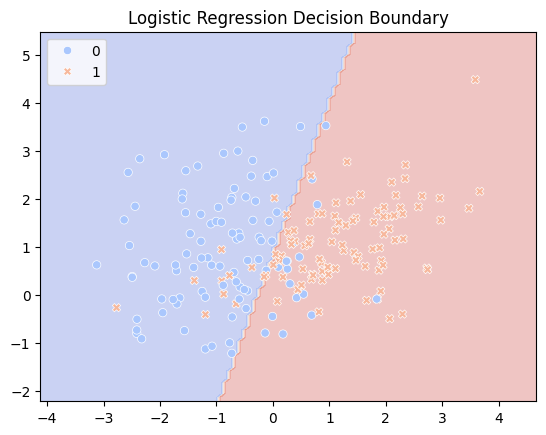

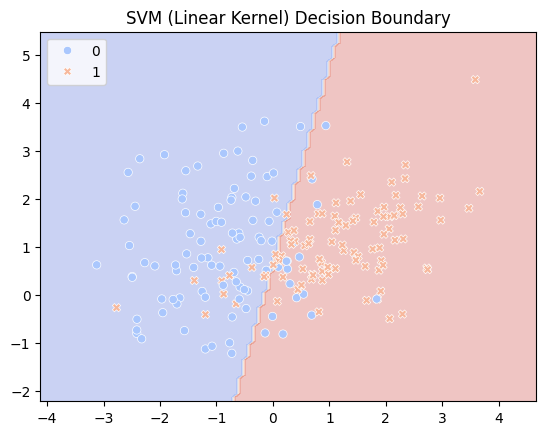

In [14]:
def plot_decision_boundary(model, X, y, title):
    """Plot the decision boundary of a model"""
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
    
    # Predict across grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and training points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, palette='coolwarm')
    plt.title(title)
    plt.show()

# Visualize Decision Boundaries for Logistic Regression & SVM (Linear Kernel)
plot_decision_boundary(log_reg, X, y, "Logistic Regression Decision Boundary")
plot_decision_boundary(svm_linear, X, y, "SVM (Linear Kernel) Decision Boundary")

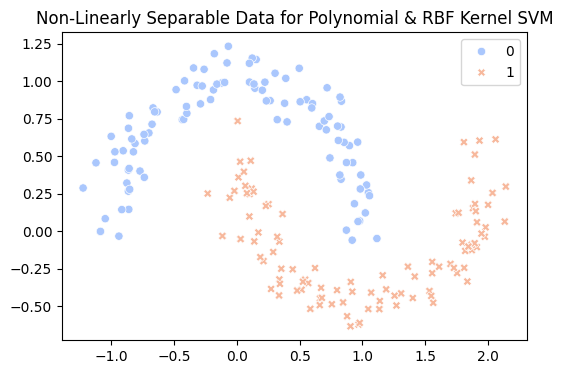

In [15]:
# Generate moon-shaped dataset
X_poly, y_poly = make_moons(n_samples=200, noise=0.1, random_state=42)

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Plot dataset
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_poly[:,0], y=X_poly[:,1], hue=y_poly, style=y_poly, palette='coolwarm')
plt.title("Non-Linearly Separable Data for Polynomial & RBF Kernel SVM")
plt.show()


=== Logistic Regression (Non-Linear Data) Metrics ===
Accuracy: 0.90
Confusion Matrix:
[[21  1]
 [ 3 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.94      0.83      0.88        18

    accuracy                           0.90        40
   macro avg       0.91      0.89      0.90        40
weighted avg       0.90      0.90      0.90        40



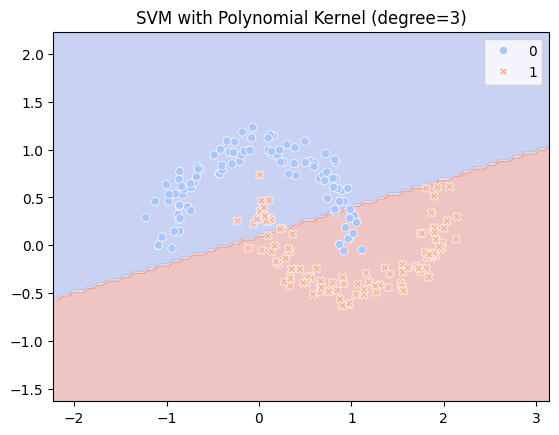

In [19]:
# Train Logistic Regression
log_reg_poly = LogisticRegression()
log_reg_poly.fit(X_train_poly, y_train_poly)

# Evaluate
y_pred_log_reg_poly = evaluate_model(log_reg_poly, X_test_poly, y_test_poly, "Logistic Regression (Non-Linear Data)")

plot_decision_boundary(log_reg_poly, X_poly, y_poly, "SVM with Polynomial Kernel (degree=3)")


=== SVM (Polynomial Kernel) Metrics ===
Accuracy: 0.97
Confusion Matrix:
[[22  0]
 [ 1 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



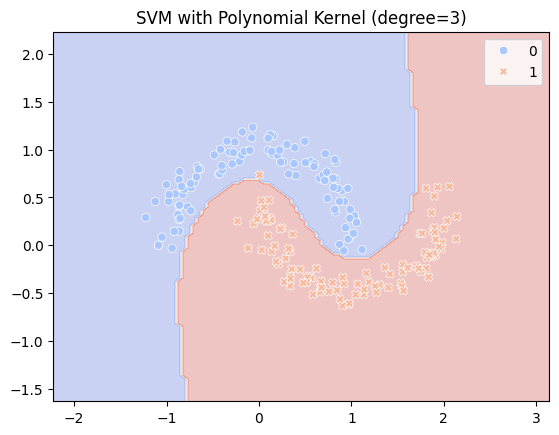

In [17]:
# Train SVM with polynomial kernel (degree=3)
svm_poly = SVC(kernel='poly', degree=3, coef0=1)
svm_poly.fit(X_train_poly, y_train_poly)

# Evaluate
y_pred_poly = evaluate_model(svm_poly, X_test_poly, y_test_poly, "SVM (Polynomial Kernel)")

# Visualize Decision Boundary
plot_decision_boundary(svm_poly, X_poly, y_poly, "SVM with Polynomial Kernel (degree=3)")


=== SVM (RBF Kernel) Metrics ===
Accuracy: 0.97
Confusion Matrix:
[[22  0]
 [ 1 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



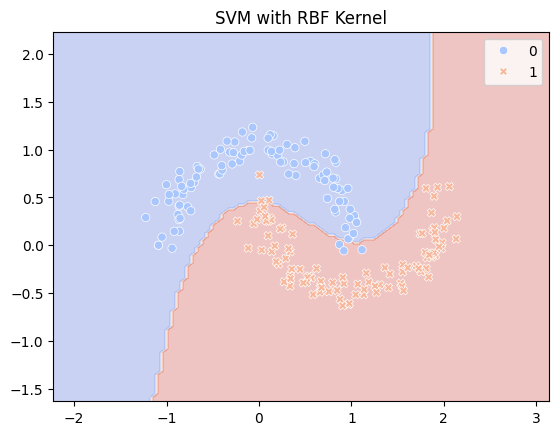

In [18]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=0.5)
svm_rbf.fit(X_train_poly, y_train_poly)

# Evaluate
y_pred_rbf = evaluate_model(svm_rbf, X_test_poly, y_test_poly, "SVM (RBF Kernel)")

# Visualize Decision Boundary
plot_decision_boundary(svm_rbf, X_poly, y_poly, "SVM with RBF Kernel")